In this project, we build decision tree models to predict breastcancer from several medical measurements. The dataset is downloaded from the UCI machine learning repo. We will see that our models perform pretty well on this dataset.

First, we load the dataset.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("breastcancer.csv")
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


We first compute the mean of other variables in each class.

In [11]:
df.groupby('Class').mean()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Class,,,,,,,,,
0,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
1,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510


Next, we plot the histogram of the clump thickness variable.

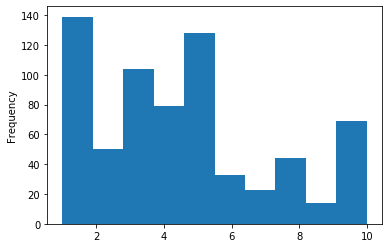

In [12]:
df['Clump Thickness'].plot(kind='hist')
plt.show()

We do not get much from this visualization, so we try plotting different variables one vs. another to find some relationship between them. 

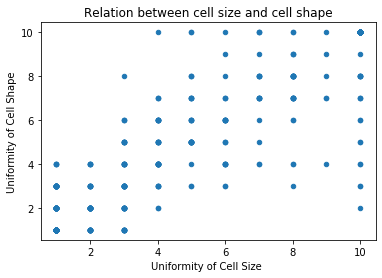

In [13]:
df.plot(kind='scatter', x='Uniformity of Cell Size ', y='Uniformity of Cell Shape')
plt.title('Relation between cell size and cell shape')
plt.show()

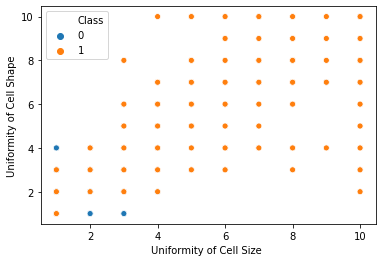

In [14]:
import seaborn as sns
sns.scatterplot(data=df, x='Uniformity of Cell Size ', y='Uniformity of Cell Shape', hue='Class')
plt.show()

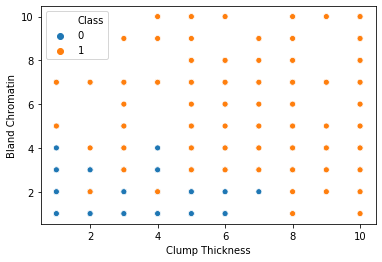

In [15]:
import seaborn as sns
sns.scatterplot(data=df, x='Clump Thickness', y='Bland Chromatin', hue='Class')
plt.show()

Again, these plots do not really show much. Next we plot the clump thickness variable by different classes; this turned out to be the most useful visual, as it illustrated the differences between class 0 and 1.

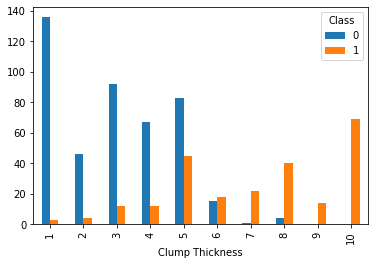

In [16]:
df.groupby('Class')['Clump Thickness'].value_counts().sort_index().unstack(0).plot(kind='bar')
plt.show()

Based on this evidence, we decided to build decision tree models to predict the class variable from other features. 

In [21]:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

We prepare the test and training data for our models.

In [22]:
X = df.drop('Class', axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

We fit a tree model to the training set, and then visualize it.

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

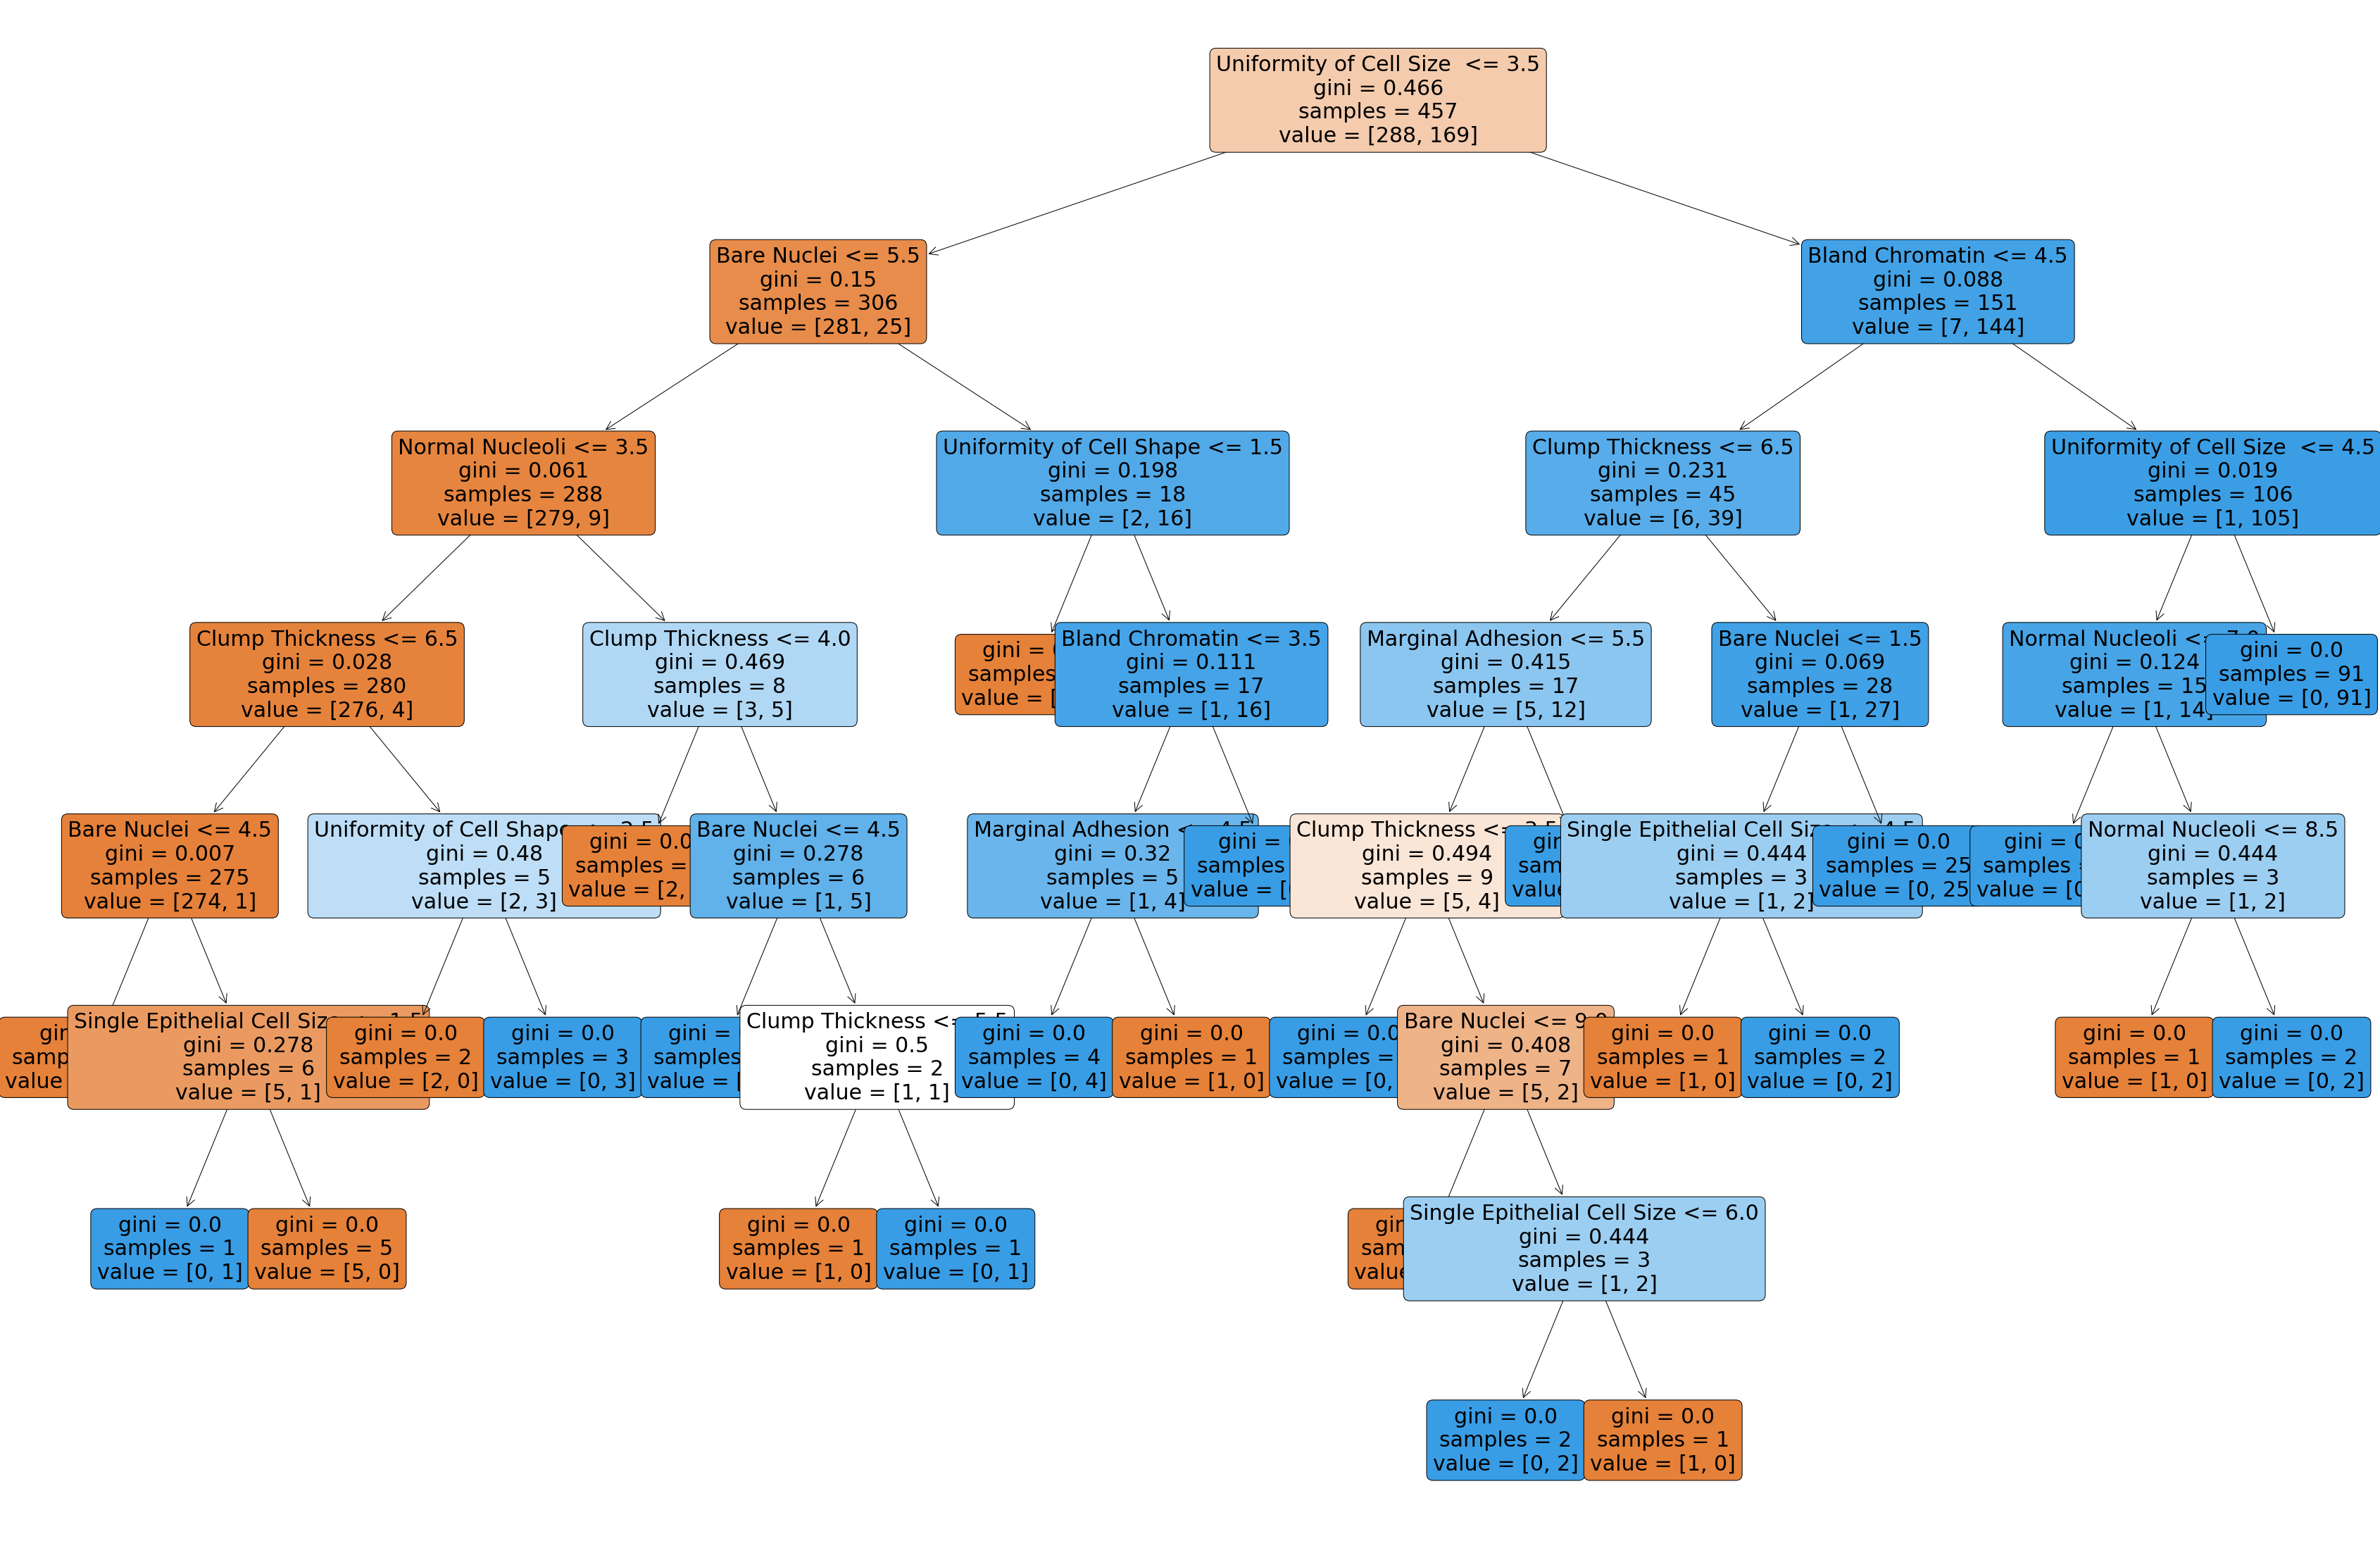

In [24]:
plt.figure(figsize=(60,40)) 
a = plot_tree(clf, feature_names=X_train.columns, #class_names=y.columns, 
              filled=True, rounded=True, fontsize=30) 
plt.show()

It seems that the model overfits the training set. So, we put a limit on the max_depth and train a new model.

In [25]:
clf1 = tree.DecisionTreeClassifier(max_depth=3)
clf1 = clf1.fit(X_train, y_train)

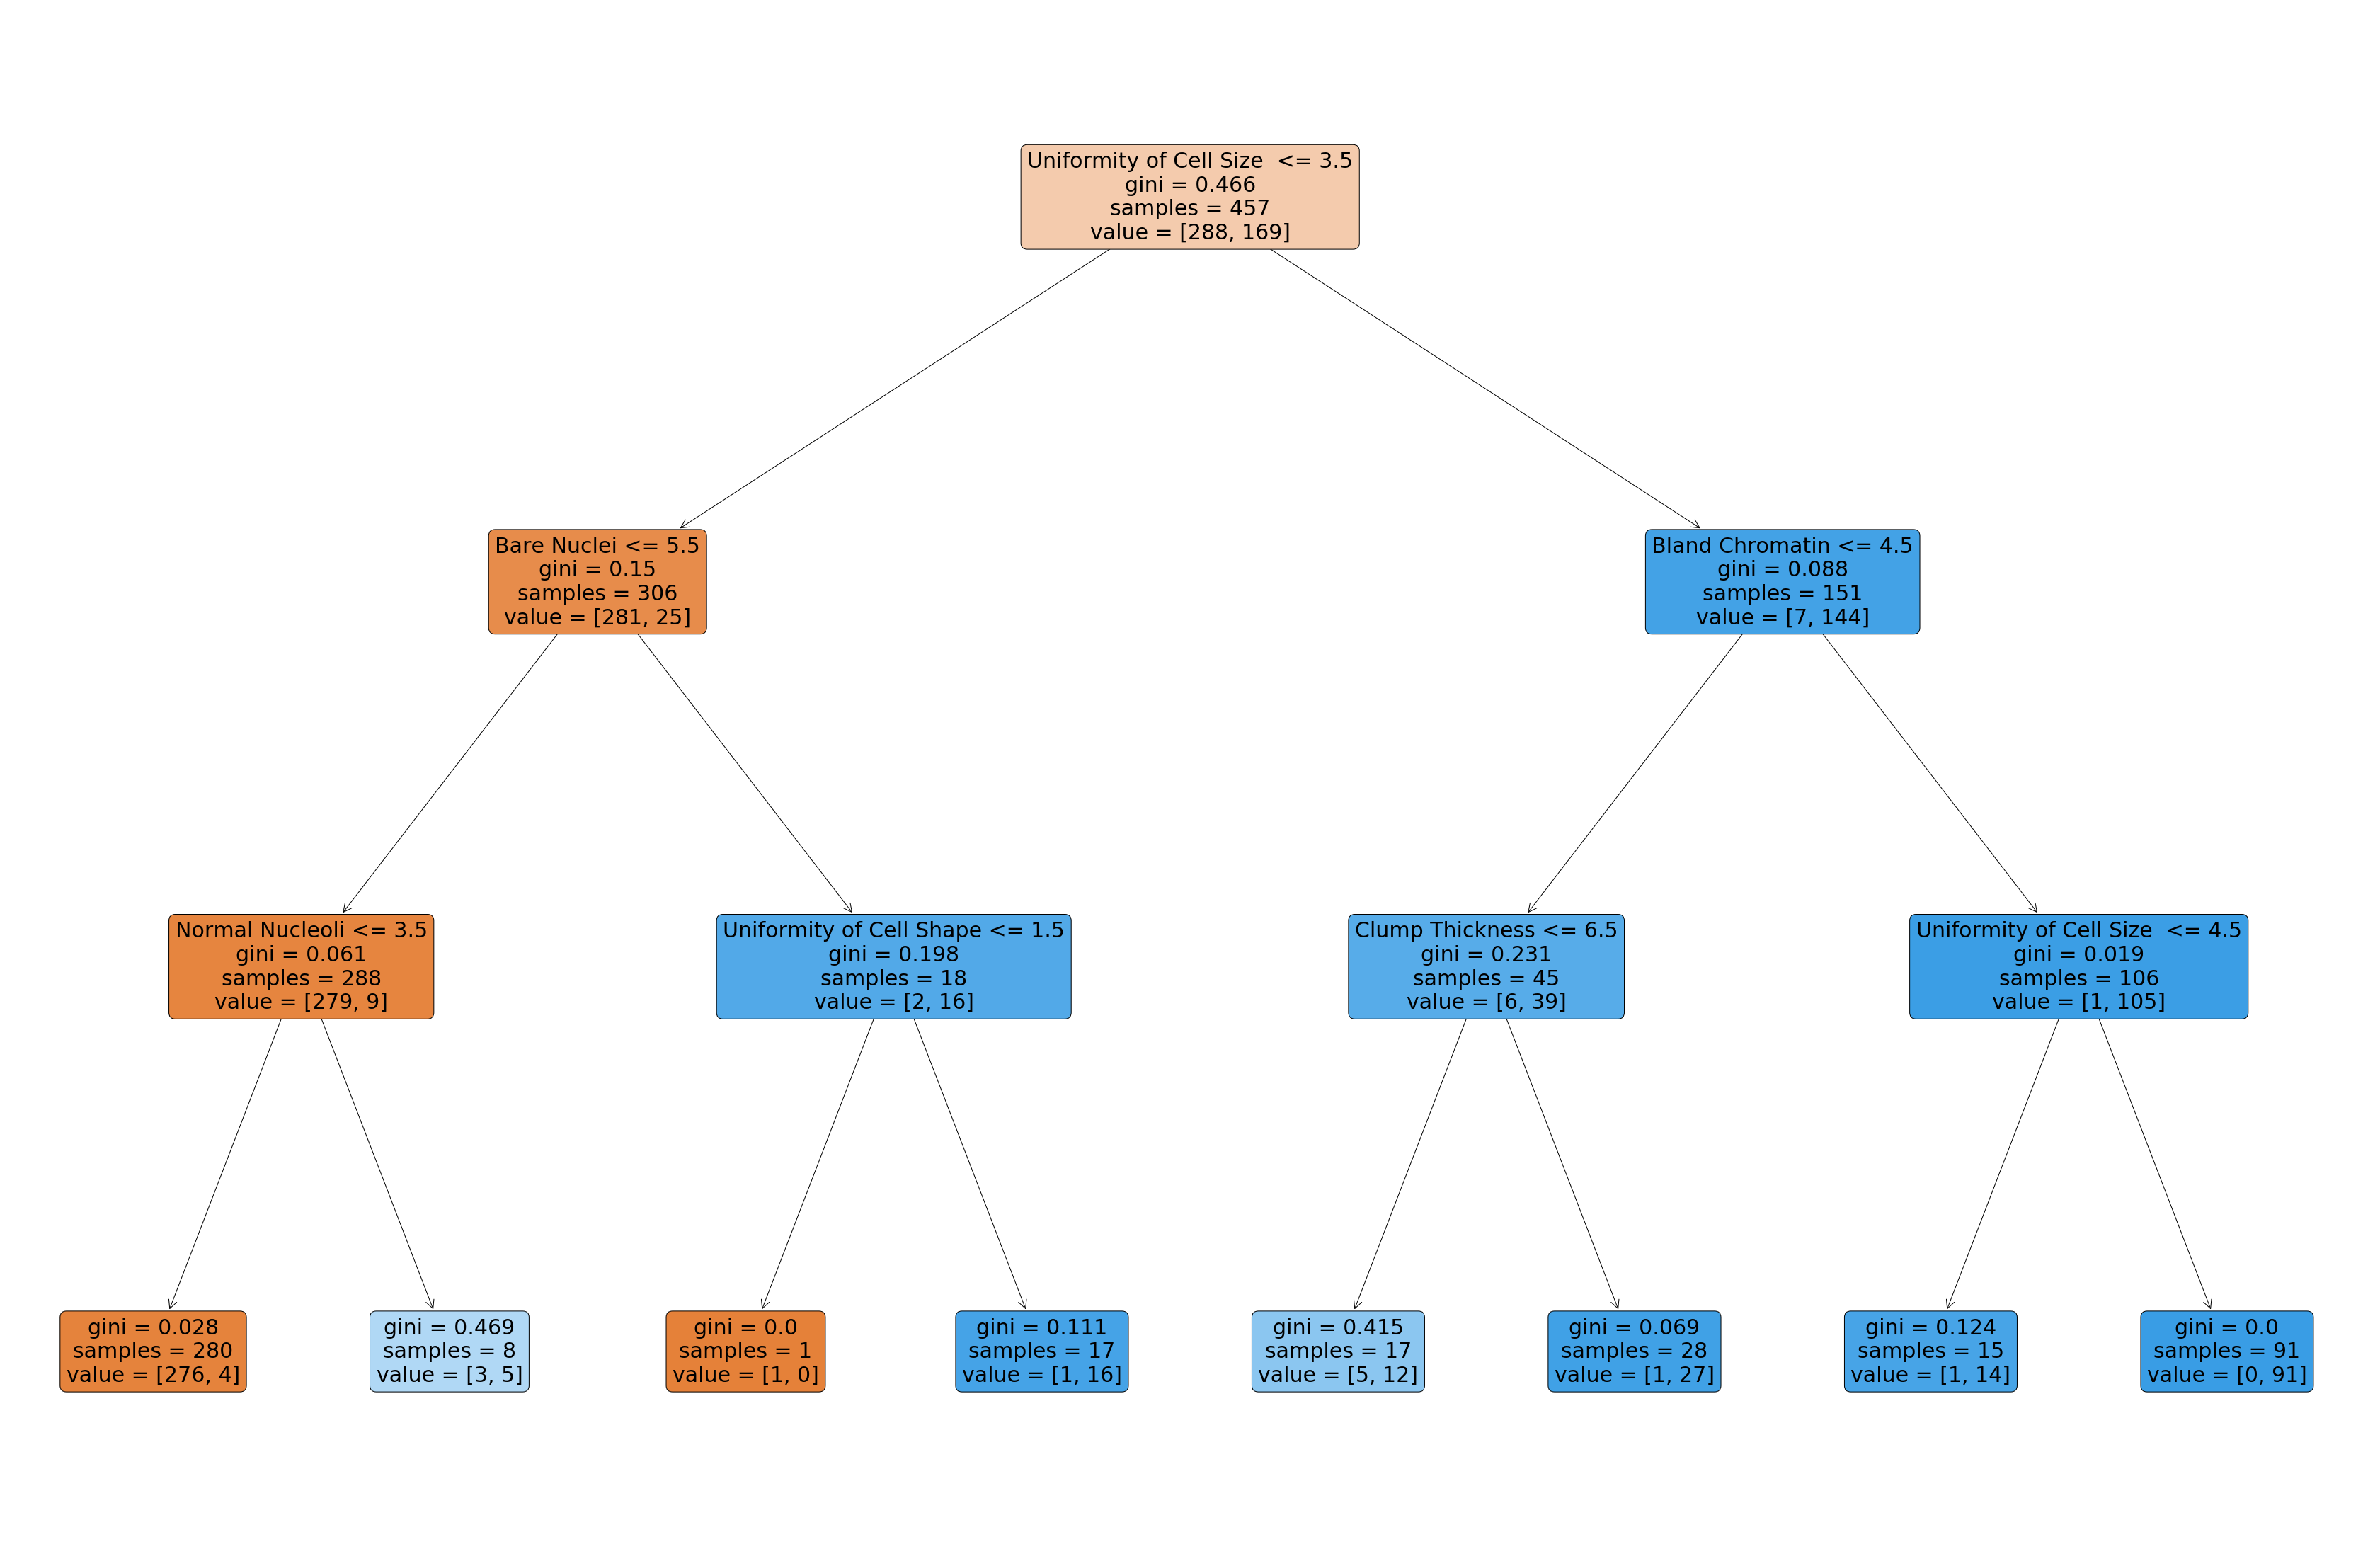

In [26]:
plt.figure(figsize=(60,40)) 
a = plot_tree(clf1, feature_names=X_train.columns, #class_names=y.columns, 
              filled=True, rounded=True, fontsize=30) 
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

We compare the prediction vs. true value on training set.

In [28]:
train_pred=clf1.predict(X_train)

In [32]:
confusion_matrix(y_train, train_pred)

array([[277,  11],
       [  4, 165]])

In [33]:
accuracy_score(y_train, train_pred)

0.9671772428884027

We do the same for the test set.

In [34]:
test_pred = clf1.predict(X_test)

In [35]:
confusion_matrix(y_test, test_pred)

array([[149,   7],
       [  3,  67]])

In [45]:
accuracy_score(y_test, test_pred)

0.9601769911504425

So, the accuracy scores are both good on the training and test sets. We can also compute other metrics: 

In [37]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       288
           1       0.94      0.98      0.96       169

    accuracy                           0.97       457
   macro avg       0.96      0.97      0.97       457
weighted avg       0.97      0.97      0.97       457



In [38]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       156
           1       0.91      0.96      0.93        70

    accuracy                           0.96       226
   macro avg       0.94      0.96      0.95       226
weighted avg       0.96      0.96      0.96       226



The stats indicate that our model is pretty effective. We also tried several parameters to see how it goes. Another method of avoiding overfitting is to increase the test size. That way, we might be able to increase the max_depth. 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
clf1 = tree.DecisionTreeClassifier(max_depth=5)
clf1 = clf1.fit(X_train, y_train)
train_pred=clf1.predict(X_train)
test_pred = clf1.predict(X_test)
print(classification_report(y_train, train_pred))
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       213
           1       1.00      0.98      0.99       128

    accuracy                           0.99       341
   macro avg       1.00      0.99      0.99       341
weighted avg       0.99      0.99      0.99       341

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       231
           1       0.95      0.93      0.94       111

    accuracy                           0.96       342
   macro avg       0.96      0.95      0.96       342
weighted avg       0.96      0.96      0.96       342

